In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

### 0. 각 Columns들이 의미하는 것이 무엇인지 숙지하자.
- ID : 집을 구분하는 번호
- date : 집을 구매한 날짜 
- price : 집의 가격(Target variable) 
- bedrooms : 침실의 수
- bathrooms : 침실 개수 당 화장실의 수(화장실의 수 / 침실의 수 )
- sqft_living : 주거 공간의 평방 피트(면적)
- sqft_lot : 부지의 평방 피트(면적) ; *부지면적 = 볼록 튀어나온 가로선을 수평 일직선으로 만든것.
- floors : 집의 층 수
- waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
- view : 집이 얼마나 좋아 보이는지의 정도
- condition : 집의 전반적인 상태
- grade : King County grading 시스템 기준으로 매긴 집의 등급
- sqft_above : 지하실을 제외한 평방 피트(면적)
- sqft_basement : 지하실의 평방 피트(면적)
- yr_built : 지어진 년도
- yr_renovated : 집을 재건축한 년도
- zipcode : 우편번호 
- lat : 위도
- long : 경도
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
- sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

In [2]:
train = pd.read_csv("../dataset/train.csv")
train.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
15034,15034,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


- date의 T이전까지만 잘라서 year, month, day 표기해볼 수 있을거 같다.
- bathroom의 경우, .5의 의미는 "**where .5 accounts for a room with a toilet but no shower**" 샤워실없이 화장실만...

In [7]:
test = pd.read_csv("../dataset/test.csv")
test.tail()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6463,21498,20140626T000000,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
6464,21499,20150126T000000,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
6465,21500,20150219T000000,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
6466,21501,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
6467,21502,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
train.info()
cols = []
for col in train.columns[1:]:
    if train[col].dtype == 'object':
        cols.append(col)
print("object data type을 가진 columns : ",cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB
object data type을 가

- 일단 전체적으로 null값이 없고
- dtype도 date를 제외하고는 수치화되어있다.

In [5]:
df_train = train[[column for column in train.columns if column != cols[0] and column != 'id']]
df_train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


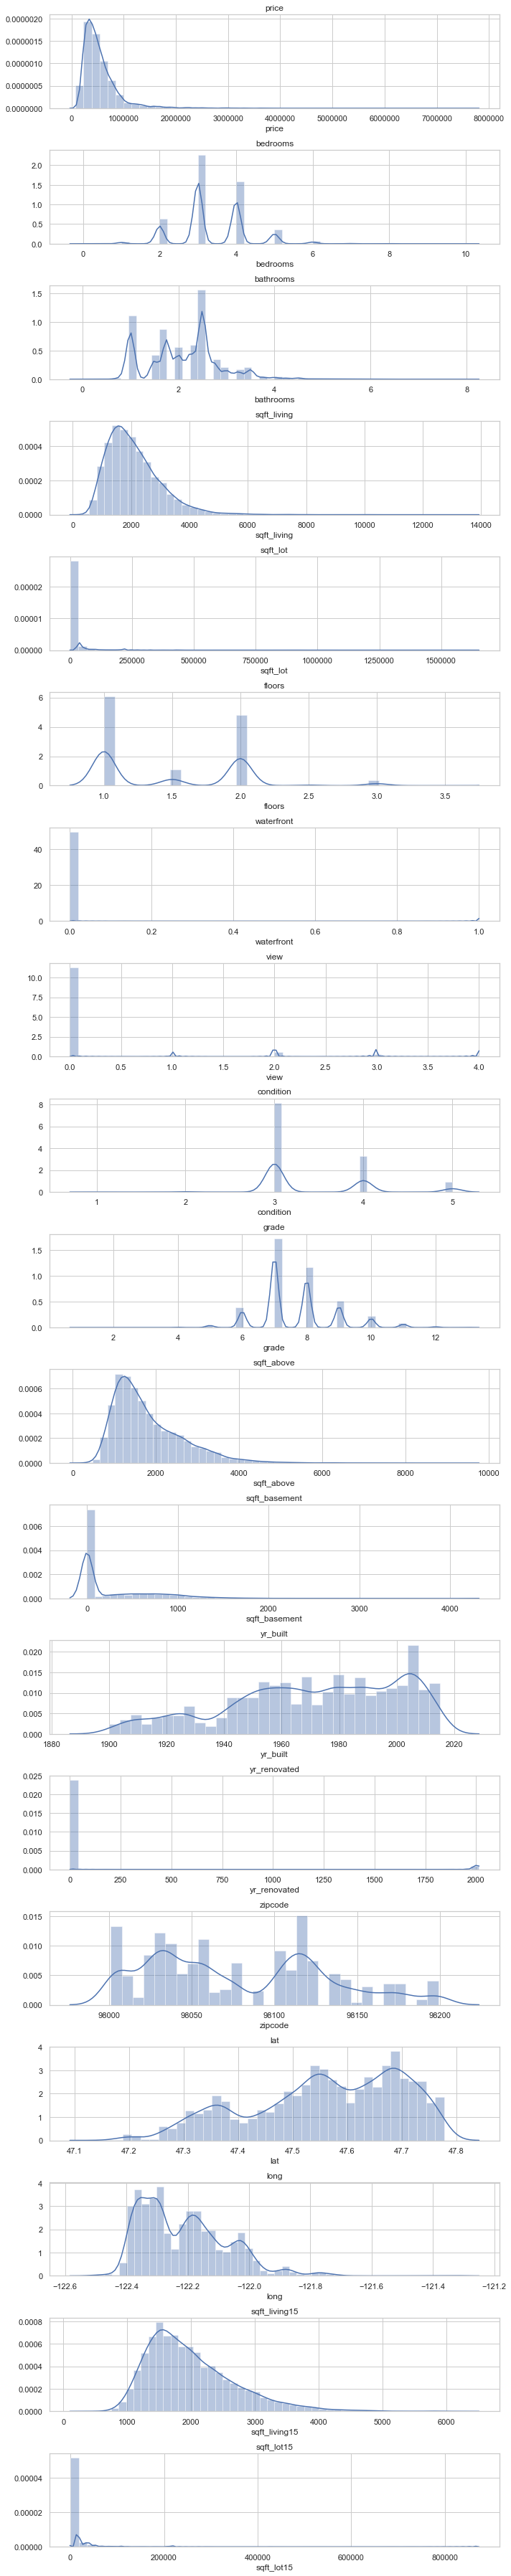

In [10]:
# 각 변수의 분포
plt.figure(figsize=(10,50))
for i in range(1,len(df_train.columns)+1):
    plt.subplot(19,1,i)
    plt.title(df_train.columns[i-1])
    sns.distplot(df_train[df_train.columns[i-1]])
    plt.tight_layout()

In [16]:
df_train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
df_train[df_train.sqft_living == 13540.000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8912,2280000.0,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


---
### 1. Column별로 Unique한 값은 ?!

In [11]:
df_train.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15030,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
15034,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [14]:
for col in df_train.columns:
    print("column : ", col)
    print("{}의 unique value 갯수 : {}\n".format(col, df_train[col].nunique()))

column :  price
price의 unique value 갯수 : 3263

column :  bedrooms
bedrooms의 unique value 갯수 : 11

column :  bathrooms
bathrooms의 unique value 갯수 : 29

column :  sqft_living
sqft_living의 unique value 갯수 : 863

column :  sqft_lot
sqft_lot의 unique value 갯수 : 7678

column :  floors
floors의 unique value 갯수 : 6

column :  waterfront
waterfront의 unique value 갯수 : 2

column :  view
view의 unique value 갯수 : 5

column :  condition
condition의 unique value 갯수 : 5

column :  grade
grade의 unique value 갯수 : 12

column :  sqft_above
sqft_above의 unique value 갯수 : 789

column :  sqft_basement
sqft_basement의 unique value 갯수 : 271

column :  yr_built
yr_built의 unique value 갯수 : 116

column :  yr_renovated
yr_renovated의 unique value 갯수 : 65

column :  zipcode
zipcode의 unique value 갯수 : 70

column :  lat
lat의 unique value 갯수 : 4692

column :  long
long의 unique value 갯수 : 716

column :  sqft_living15
sqft_living15의 unique value 갯수 : 682

column :  sqft_lot15
sqft_lot15의 unique value 갯수 : 6958



##### bathrooms 소숫점의 의미
- full bath : 화장실, 세면대, 샤워실, 욕조 ---> 1
- 3/4 bath : 화장실, 세면대, 샤워실 ---> 0.75
- half bath : 화장실, 세면대 ---> 0.5
- [참고 Discussion](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/discussion/83533)

- 튀는 값은 딱히 없어보이는데...

---
### 2. Column간의 상관관계
- 먼저, 각 column과 price간의 선형관계 맛보기.

In [17]:
import seaborn as sns

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


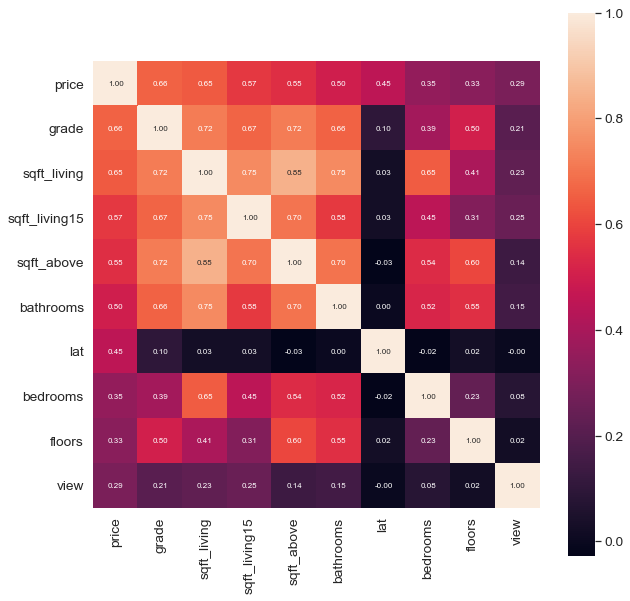

In [18]:
# correlation이 높은 상위 10개의 heatmap
# continuous + sequential variables --> spearman
# abs는 반비례관계도 고려하기 위함
cor_abs = abs(df_train.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='price').index # price과 correlation이 높은 column 10개 뽑기(내림차순)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(df_train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

---
### 3. column 좀 더 자세하게 보기

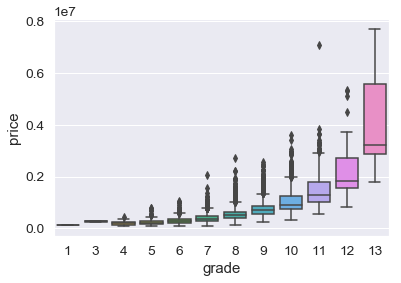

In [19]:
# 가장 높은 grade를 따로 뽑아보자
# grade는 순서의 의미를 가진 변수
# 확률변수값 x price --> boxplot
sns.boxplot(data=df_train, x='grade', y='price')

- 각 box위 아래로 그어진 선의 의미 : 1.5 x IQR 만큼 높은 값의 구간을 기준으로 그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분
- 이것보다 위에 찍힌 검은점들은 outlier.
- 뭔가 선형적관계가 있는거 같으면서도, exponential한 관계도 있는듯.
- grade = 11에 튀는 값도 보이고[](http://)

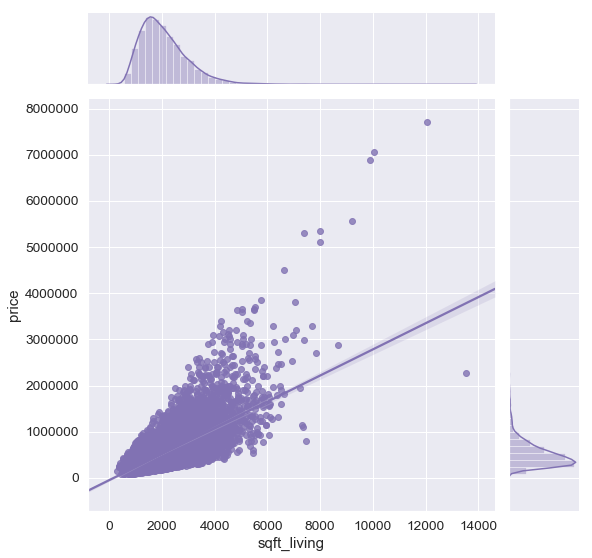

In [20]:
# 다음으로 높은 sqft_living
sns.jointplot(data=df_train, x='sqft_living', y='price',kind="reg", color="m",height=8)
plt.show()

- 주거면적이 14000피트에 이르는데 가격이 2000000정도라는건 튀는값인가..

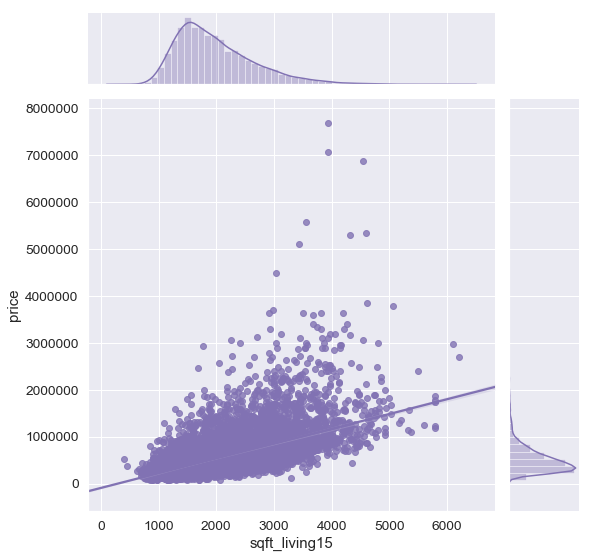

In [21]:
# sqft_living15
sns.jointplot(data=df_train, x='sqft_living15', y='price',kind="reg", color="m",height=8)
plt.show()

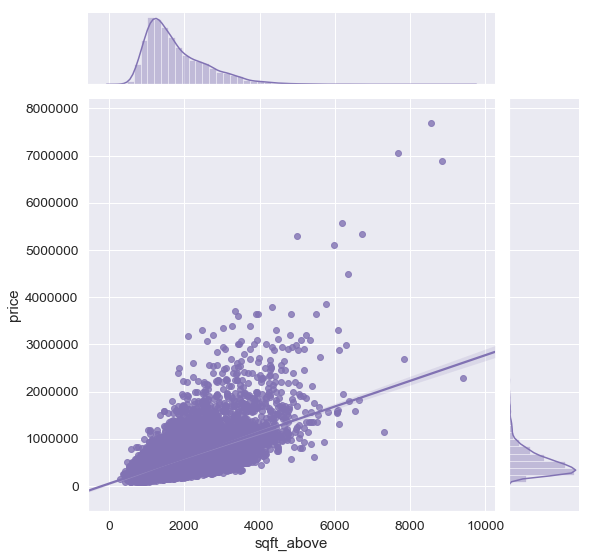

In [22]:
# sqft_above
sns.jointplot(data=df_train, x='sqft_above', y='price',kind="reg", color="m",height=8)
plt.show()

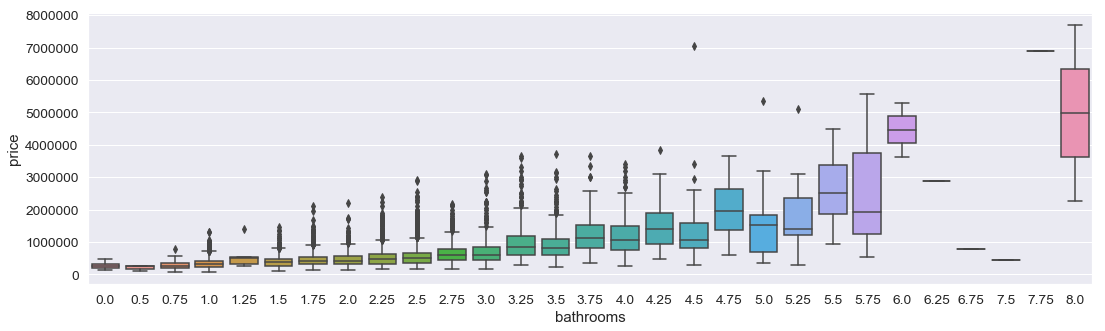

In [23]:
# bathrooms
plt.figure(figsize=(18,5))
sns.boxplot(data=df_train, x='bathrooms', y='price')
plt.show()

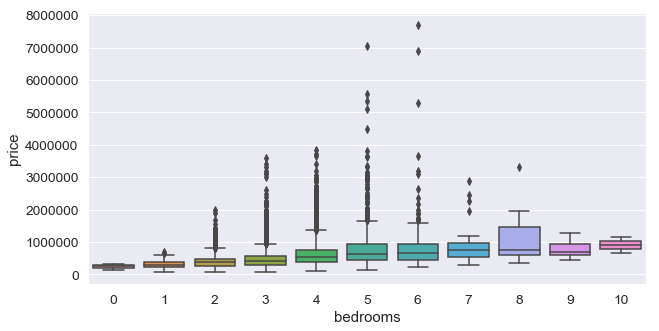

In [24]:
# bedrooms
plt.figure(figsize=(10,5))
sns.boxplot(data=df_train, x='bedrooms', y='price')
plt.show()

- bedrooms 2~6에 이상치(outlier)가 집중되어있다. 왜지?

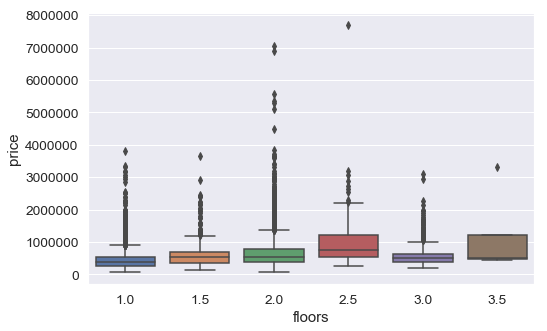

In [25]:
# floors
plt.figure(figsize=(8,5))
sns.boxplot(data=df_train, x='floors', y='price')
plt.show()

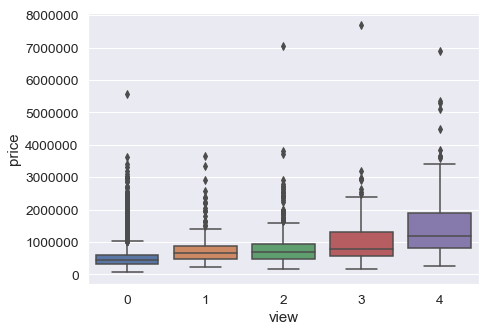

In [26]:
# view
plt.figure(figsize=(7,5))
sns.boxplot(data=df_train, x='view', y='price')
plt.show()

##### **지리적 정보 시각화**

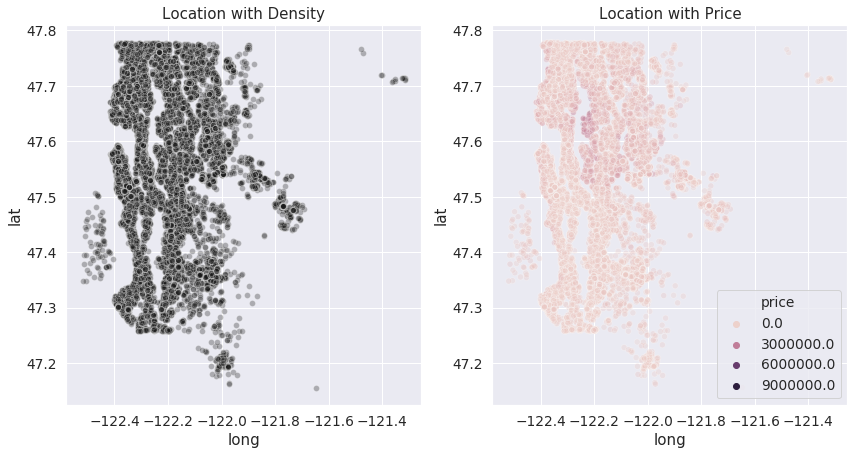

In [24]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Location with Density")
sns.scatterplot(data=df_train, x='long', y='lat', alpha=0.3, color='k')
plt.subplot(1,2,2)
plt.title("Location with Price")
sns.scatterplot(data=df_train, x='long', y='lat', alpha=0.3, color='r', hue='price')

### 3. 'Price'의 분포와 스케일링
- 원래 선형회귀모형의 가정에는 독립 변수나 종속 변수가 반드시 대칭 분포를 보여야 한다는 가정은 없지만,
- 정규 분포에 가까운 분포를 보일 수록 선형회귀모형의 성능이 좋아지는 경우가 많다.

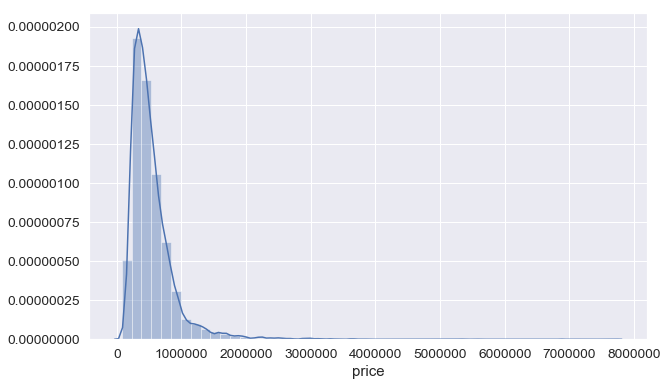

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(df_train['price'])

- 심하게 한쪽으로 치우쳤다.
- 이경우 회귀의 성능에 안좋은 영향을 미칠수 있다.

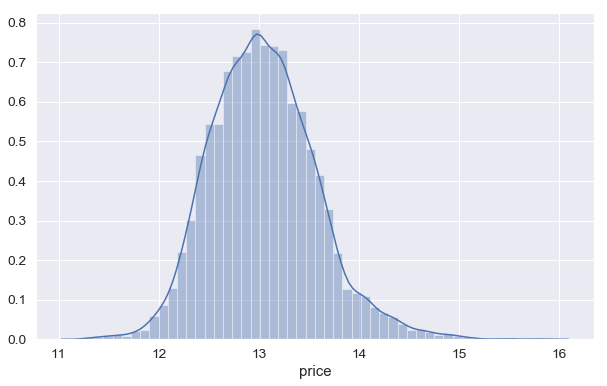

In [28]:
# log를 취하여 다시 그려보자
plt.figure(figsize=(10,6))
sns.distplot(np.log1p(df_train['price']))

- 종속변수가 조금더 대칭분포와 비슷해졌다.

- 밀집도(density)가 영향을 줄 수 있을까?....없어보...

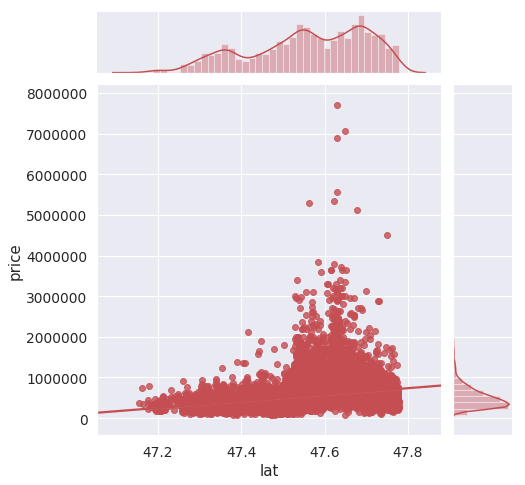

In [25]:
# latitude와 price가 어느정도 상관관계가 있는것으로 나왔다.
sns.jointplot(data=df_train, x='lat', y='price', kind='reg', height=7, color='r')

- 47.5~47.5 : 가격의 변화가 보이는 부분

### 1차 정리
- 'Price'의 값에 log를 취해 정규분포의 형태로 만들어준다. (보다 나은 성능을 위해)
- 여러 이상치들을 볼 수 있었다.
- 선형적인 관계를 보이는것들은 'grade', 'sqft_living' 정도이다.
- **각 column간의 상관관계**가 있을수 있으므로 **partial regression등으로 시각화**도 해봐야할거 같다.
- 추가적인 Feature Extraction과 **비선형관계까지 고려**해봐야할거 같다.

---

### 시간관련 column : date, yr_built, yr_renovated

In [6]:
train.drop(columns=['id'], inplace=True)
df = train.copy()

In [13]:
df['buy_year'] = df['date'].map(lambda x : int(x.split('T')[0][:4]))
df['buy_month'] = df['date'].map(lambda x : int(x.split('T')[0][4:6]))
df['buy_day'] = df['date'].map(lambda x : int(x.split('T')[0][6:]))

In [15]:
df.drop(columns=['date'], inplace=True)

In [24]:
df[['buy_year', 'buy_month','buy_day', 'price']].corr()

,buy_year,buy_month,buy_day,price
buy_year,1.000000,-0.781074,-0.005003,0.008012
buy_month,-0.781074,1.000000,-0.061457,-0.010352
buy_day,-0.005003,-0.061457,1.000000,-0.013625
price,0.008012,-0.010352,-0.013625,1.000000


- 큰 상관관계를 보이진 않는다.

In [25]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'buy_year', 'buy_month', 'buy_day'],
      dtype='object')

### View and Condition
- view : 집이 얼마나 좋아보이는지
- condition : 집의 전반적인 상태

In [30]:
df['view'].value_counts() # 1~5까지 맞춰서 condition하고 엮어보자.

0    13548
2      665
3      373
1      241
4      208
Name: view, dtype: int64

In [36]:
df[['view', 'price']].corr()

,view,price
view,1.000000,0.400806
price,0.400806,1.000000


In [31]:
df['condition'].value_counts()

3    9793
4    3956
5    1155
2     110
1      21
Name: condition, dtype: int64

In [37]:
df[['condition', 'price']].corr()

,condition,price
condition,1.00000,0.03974
price,0.03974,1.00000


- 전반적인 상태보다는 겉으로 보기에 얼마나 괜찮은지가 중요해보인다.

### Zipcode
- 중심지와 교외지역 등을 구분할 수 있지 않을까?

In [35]:
df['zipcode'].value_counts()

98103    421
98038    420
98115    408
98052    408
98117    387
98034    382
98042    372
98118    350
98023    349
98059    345
98133    344
98006    341
98058    306
98155    303
98033    296
98074    295
98125    294
98053    284
98027    275
98056    274
98075    258
98126    251
98106    247
98144    240
98001    239
98092    232
98029    229
98116    226
98065    216
98199    213
        ... 
98008    189
98168    185
98055    185
98003    185
98072    181
98136    179
98112    177
98166    176
98105    174
98177    170
98045    159
98022    159
98077    149
98011    147
98108    136
98002    131
98019    131
98119    127
98005    115
98007    103
98188     91
98014     90
98032     85
98070     79
98109     78
98102     75
98010     63
98024     54
98148     44
98039     36
Name: zipcode, Length: 70, dtype: int64

---

In [39]:
pd.get_dummies(df, prefix=['view', 'condition'] ,columns=['view', 'condition'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,...,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5
0,221900.0,3,1.00,1180,5650,1.0,0,7,1180,0,...,1,0,0,0,0,0,0,1,0,0
1,180000.0,2,1.00,770,10000,1.0,0,6,770,0,...,1,0,0,0,0,0,0,1,0,0
2,510000.0,3,2.00,1680,8080,1.0,0,8,1680,0,...,1,0,0,0,0,0,0,1,0,0
3,257500.0,3,2.25,1715,6819,2.0,0,7,1715,0,...,1,0,0,0,0,0,0,1,0,0
4,291850.0,3,1.50,1060,9711,1.0,0,7,1060,0,...,1,0,0,0,0,0,0,1,0,0
5,662500.0,3,2.50,3560,9796,1.0,0,8,1860,1700,...,1,0,0,0,0,0,0,1,0,0
6,468000.0,2,1.00,1160,6000,1.0,0,7,860,300,...,1,0,0,0,0,0,0,0,1,0
7,310000.0,3,1.00,1430,19901,1.5,0,7,1430,0,...,1,0,0,0,0,0,0,0,1,0
8,400000.0,3,1.75,1370,9680,1.0,0,7,1370,0,...,1,0,0,0,0,0,0,0,1,0
9,530000.0,5,2.00,1810,4850,1.5,0,7,1810,0,...,1,0,0,0,0,0,0,1,0,0


In [38]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'buy_year', 'buy_month', 'buy_day'],
      dtype='object')

- one-hot 대상들 : 
    - ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'buy_year', 'buy_month', 'buy_day']
- 이러면 spasity가 너무 커진다.